# Example: XRD spectra

### Importing necessary packages

In [1]:
from modules.uxdreader import UXDReader
from sdRDM import DataModel
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
%matplotlib inline

#hi


### Loading data model from GitHub

In [2]:
url_example_showcase = "https://github.com/FAIRChemistry/example_showcase.git"

In [3]:
model = DataModel.from_git(url=url_example_showcase)

Cloning into '/tmp/tmp2yatyg36'...


### Parsing XRD data

In [4]:
path_to_directory = Path.cwd()
reader = UXDReader(path_to_directory)
meta_data = reader.extract_meta_data('XRD_data_set')
data = reader.extract_data('XRD_data_set')

### Working with the data model

Feeding the data model with information.

In [5]:
SpecInf = model.SpecInf(
    wl = meta_data['WLS'],
    wl_ratio = meta_data['WLRATIO'],
    anode = meta_data['ANODE'],
    steptime = meta_data['STEPTIME'],
    stepsize = meta_data['STEPSIZE'],
    theta = meta_data['THETA'],
    start = meta_data['START'],
    theta2 = meta_data['THETA2']
)

In [6]:
Dataset = model.Dataset(
    name_exp = 'Richard Schoemig',
    date = meta_data['DATEMEASURED'],
    compound = 'Merlinoite',
    sample_id = meta_data['SAMPLE'],
    spec_inf = SpecInf
)

In [7]:
print(Dataset.yaml())

__source__:
  commit: 073fda8574fb3bdc47fd6bca4e6b41eed0889251
  repo: https://github.com/FAIRChemistry/example_showcase.git
  root: Dataset
  url: https://github.com/FAIRChemistry/example_showcase/tree/073fda8574fb3bdc47fd6bca4e6b41eed0889251
compound: Merlinoite
date: 2019-11-26 13:44:11
id: dataset0
name_exp: Richard Schoemig
sample_id: 191126_P1_MER_RS03_3d_150_unkalz_V57
spec_inf:
  anode: Cu
  id: specinf0
  start: 5.0
  stepsize: 0.015259
  steptime: 398.003998
  theta: 2.5
  theta2: 5.0
  wl:
    - 1.5406
    - 1.54439
    - 1.39222
  wl_ratio: 0.5



 Plotting the data

<AxesSubplot:xlabel='Angle', ylabel='Intensity'>

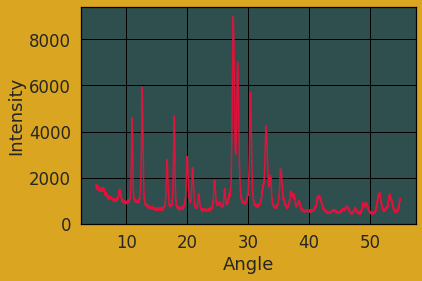

In [8]:
sns.set_theme(rc={'axes.facecolor':'darkslategray', 'figure.facecolor':'goldenrod', 'grid.color':'black', 'axes.edgecolor':'black'})
sns.set_context("notebook", font_scale=1.5)
sns.lineplot(x = "Angle", y = "Intensity", data=data, color = 'crimson')
